<h1 style="text-align: center;">Clustering Algorithms: K-means and DBSCAN</h1>


***

This is how *K-means* and *DBSCAN* works. Besides, we show several drawbacks of *K-means* and provide solutions for addressing those drawbacks, including cluster quality analysis.

## K-means

### The Algorithm

1. Randomly choose $k$ centroids $C = \{c_1, c_2, \dots, c_k\}$ from the data points $X = \{x_1, x_2, \dots, x_n\} \in \mathbb{R}^D $.
2. For each data point $x_i$, find the nearest centroid $c_j$ as its corresponding cluster using *sum of squared distance* $ D(x_i, c_j) = \displaystyle\sum_{i=1}^{n}{\| x_i - c_j \|^2}$.
3. For each cluster, update its centroid by computing means value along the dimension of data points in the cluster.
4. Compute the displacement between the old and the new centroids and repeat steps 2 and 3 if the displacement is less than a threshold (converged).

In [1]:
# Start from importing necessary packages.
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from IPython.display import display
from sklearn import metrics # for evaluations
from sklearn.datasets import make_blobs, make_circles # for generating experimental data
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN

# make matplotlib plot inline (Only in Ipython).
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Generate data.
# `random_state` is the seed used by random number generator for reproducibility (default=None).
X, y = make_blobs(n_samples=5000,
                  n_features=2,
                  centers=3,
                  random_state=170)

# Print data like Ipython's cell output (Only in Ipython, otherwise use `print`).
display(X)
display(y)

array([[-4.01009423, -1.01473496],
       [ 1.00550526,  0.13163222],
       [ 2.06563121, -0.24527689],
       ...,
       [-5.09493013,  1.47160372],
       [-9.61459714, -4.91848716],
       [-7.72675795, -5.86656563]])

array([1, 2, 2, ..., 1, 0, 0])

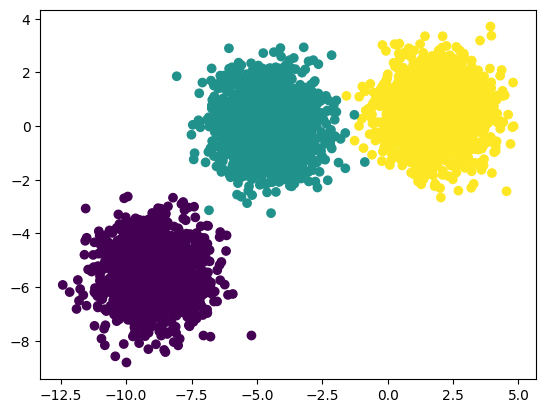

In [3]:
# Plot the data distribution (ground truth) using matplotlib `scatter(axis-x, axis-y, color)`.
plt.scatter(X[:,0], X[:,1], c=y)

In [5]:
""" K-means clustering algorithm.

Parameters
----------
n_init: int, optional, default: 10
        Number of time the k-means algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of inertia.
        
init: {'k-means++', 'random', or ndarray, or a callable}, optional
        Method for initialization, default to 'k-means++'.
        
        'k-means++': selects initial cluster centers for k-mean
        clustering in a smart way to speed up convergence.
        
        'random': generate k centroids from a Gaussian with mean and
        variance estimated from the data.

tol: float, default: 1e-4
        Relative tolerance with regards to inertia to declare convergence
        tolerance is computed using `np.mean(np.var(X, axis=0)) * tol)`

"""

# Perform K-means on our data (Train centroids)
kmeans = KMeans(n_clusters=3,
                n_init=3,
                init='random',
                tol=1e-4, 
                random_state=170,
                verbose=True).fit(X)

Initialization complete
Iteration 0, inertia 113728.9994342094.
Iteration 1, inertia 49800.834442032414.
Iteration 2, inertia 49491.54294846192.
Iteration 3, inertia 49052.44820706853.
Iteration 4, inertia 47127.08278165685.
Iteration 5, inertia 38352.58250058118.
Iteration 6, inertia 15937.04778656888.
Iteration 7, inertia 9743.053237035438.
Iteration 8, inertia 9733.167635199436.
Converged at iteration 8: center shift 8.017874814661839e-06 within tolerance 0.0014634111435935595.
Initialization complete
Iteration 0, inertia 37255.015677182935.
Iteration 1, inertia 10907.457687453949.
Iteration 2, inertia 9734.519892392898.
Converged at iteration 2: center shift 0.0007621900298187911 within tolerance 0.0014634111435935595.
Initialization complete
Iteration 0, inertia 45752.21565817257.
Iteration 1, inertia 43644.21904942104.
Iteration 2, inertia 43421.685035126226.
Iteration 3, inertia 43292.85116002934.
Iteration 4, inertia 43173.348857533354.
Iteration 5, inertia 42979.79101624618.
I

In [6]:
# Retrieve predictions and cluster centers (centroids).
display(kmeans.labels_)
display(kmeans.cluster_centers_)

array([2, 0, 0, ..., 2, 1, 1], dtype=int32)

array([[ 1.89450492,  0.5009336 ],
       [-8.94710203, -5.51613184],
       [-4.55676387,  0.04603707]])

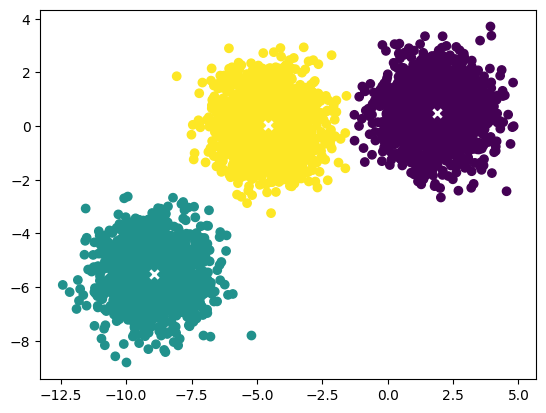

In [7]:
# Plot the predictions.
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], 
            c='w', marker='x', linewidths=2)

In [8]:
# We can make new predictions without re-run kmeans (simpily find nearest centroids).
X_new = np.array([[10,10], [-10, -10], [-5, 10]])
y_pred = kmeans.predict(X_new)

""" The below code is equivalent to:
y_pred = KMeans(...).fit_predict(X), but this needs to fit kmeans again.
"""

display(y_pred)

array([0, 1, 2], dtype=int32)

In [9]:
# We can get distances from data point to every centroid

""" The below code is equivalent to:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances(X_new, kmeans.cluster_centers_)
"""

kmeans.transform(X_new)

array([[12.48724601, 24.48965134, 17.63464636],
       [15.86659553,  4.60582976, 11.42592142],
       [11.73739582, 16.01030799,  9.96382639]])

## Drawbacks of K-means

### Drawback 1: Need to choose a right number of clusters

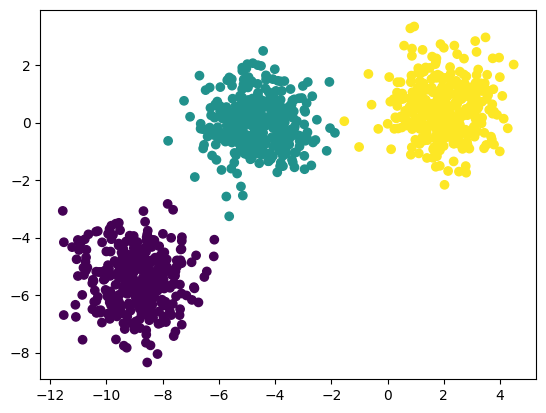

In [10]:
# Generate data.
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=3,
                  random_state=170)

# Plot the data distribution.
plt.scatter(X[:,0], X[:,1], c=y)

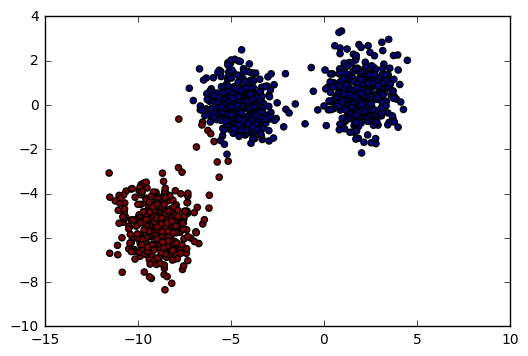

In [12]:
# Run k-means on non-spherical data.
y_pred = KMeans(n_clusters=2, random_state=170).fit_predict(X)

# Plot the predictions.
plt.scatter(X[:,0], X[:,1], c=y_pred)

The silhouette plot shows that the `n_clusters` value of 3, 5 and 6 are a bad pick for the given data due to the presence of clusters with above average silhouette scores and also due to wide fluctuations in the size of the silhouette plots. Silhouette analysis is more ambivalent in deciding between 2 and 4.

### Drawback 2: Cannot handle noise data and outliers

Even noise data and outliers are easily observed from the following clustering results (the data points which are relatively far away from the centroids), *K-means* still puts them into the clusters.

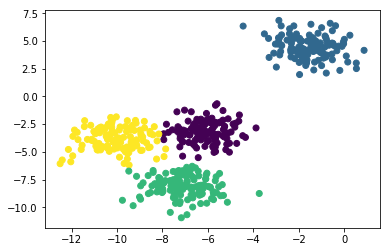

In [20]:
# Generate data.
# This particular setting has one distinct cluster and 3 clusters placed close together.
# (Same as the above example)
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

# Perform k-means with n_clusters=4
kmeans = KMeans(n_clusters=4, random_state=10)
y_pred = kmeans.fit_predict(X)

# Plot the prediction
plt.scatter(X[:,0], X[:,1], c=y_pred)

### Drawback 3: Cannot handle non-spherical data

> *K-means* clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with **the nearest mean**. (Wikipedia) 

Since the concentric circles would have the approximately same mean, so k-means is not suitable to separate them.

Let's generate non-spherical data and plot the ground truths of clusters.

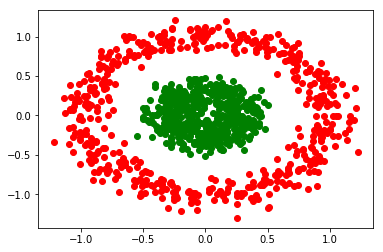

In [21]:
# Generate non-spherical data.
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)

# Plot the data distribution. (Here's another way to plot scatter graph)
plt.plot(X[y == 0, 0], X[y == 0, 1], 'ro')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'go')

After performing *K-means* on non-spherical data, the following result shows that it fails to cluster non-spherical data, since *K-means* has an assumption that the data distribution is spherical.

Homogeneity: 6.406853007629834e-16
Completeness: 6.408702291529841e-16
Mean Silhouette score: 0.2897594003505326


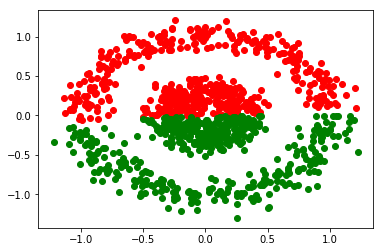

In [22]:
# Run k-means on non-spherical data.
y_pred = KMeans(n_clusters=2, random_state=170).fit_predict(X)

# Plot the predictions.
plt.plot(X[y_pred == 0, 0], X[y_pred == 0, 1], 'ro')
plt.plot(X[y_pred == 1, 0], X[y_pred == 1, 1], 'go')

# Print the evaluations
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print('Mean Silhouette score: {}'.format(metrics.silhouette_score(X, y_pred)))

## DBSCAN: Density-Based Spatial Clustering of Applications with Noise

### Parameters
- $Eps$: Maximum radius of the neighborhood.
- $MinPts$: Minimum number of points in the Eps-neighborhood of a point.

### Terms
- The Eps-neighborhood of a point $q$－$N_{Eps}$: A point $p \in N_{Eps}(q)$ if $D(p,q) \leq Eps$. (Point inside the circle).
- Outlier: Not in a cluster.
- Core point: $\left\vert N_{Eps}(q) \right\vert \geq MinPts$ (dense neighborhood).
- Border point: In cluster but neighborhood is not dense.

<div style="text-align:center"><img width="300px" src="../img/core-border-point.png"/></div>


- Directly density-reachable: A point $p$ is **directly density-reachable** from a point $q$ w.r.t $Eps$ and $MinPts$ if:
    - $p \in N_{Eps}(q)$, and $q$ is a **core point**.
    - $p$ **doesn't** need to be a core point.

<div style="text-align:center"><img width="250px" src="../img/directly-density-reachable.png"/></div>

- Density-reachable: A point $p$ is **density-reachable** from a point $q$ w.r.t. $Eps$ and $MinPts$ if there is a chain of points $p_1, \dots, p_n,\ p_1 = q,\ p_n = p$ such that $p_{i+1}$ is directly density-reachable from $p_i$.

<div style="text-align:center"><img width="150px" src="../img/density-reachable.png"/></div>

### The Algorithm
1. Randomly choose a point $p$.
2. Retrieve all points density-reachable from $p$ w.r.t. $Eps$ and $MinPts$.
3. If $p$ is a core point, a cluster is formed.
4. If $p$ is a border point, no points are density-reachable from $p$, then visit the next point.
5. Repeat the process until all the data points have been processed.

Let's begin to perform *DBSCAN* on spherical data

Number of clusters: 3
Homogeneity: 0.9820397966048766
Completeness: 0.937810961939573
Mean Silhouette score: 0.6798548805414468


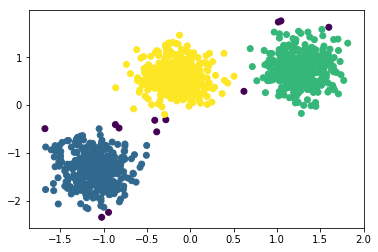

In [23]:
# Generate data with 3 centers.
X, y = make_blobs(n_samples=1000, 
                  n_features=2, 
                  centers=3,
                  random_state=170)

# Standardize features to zero mean and unit variance.
X = StandardScaler().fit_transform(X)

# Perform DBSCAN on the data
y_pred = DBSCAN(eps=0.3, min_samples=30).fit_predict(X)

# Plot the predictions
plt.scatter(X[:,0], X[:,1], c=y_pred)

# Print the evaluations
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print('Mean Silhouette score: {}'.format(metrics.silhouette_score(X, y_pred)))

The **black** data points denote the **outliers** in the above result.

Note that we don't need to specify the number of clusters with *DBSCAN* algorithm. Besides, *DBSCAN* is good at finding out the outliers without requiring some hacks like we did above in *K-means* section. 

Now, let's try *DBSCAN* on non-spherical data.

Number of clusters: 2
Homogeneity: 1.0000000000000007
Completeness: 0.9674821767755115
Mean Silhouette score: 0.13157963137304263


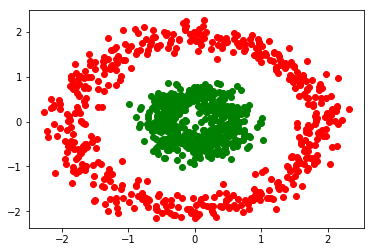

In [24]:
# Generate non-spherical data.
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)

# Standardize features to zero mean and unit variance.
X = StandardScaler().fit_transform(X)

# Perform DBSCAN on the data
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

# Plot the data distribution. (Here's another way to plot scatter graph)
plt.plot(X[y_pred == 0, 0], X[y_pred == 0, 1], 'ro')
plt.plot(X[y_pred == 1, 0], X[y_pred == 1, 1], 'go')

# Print the evaluations
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print('Mean Silhouette score: {}'.format(metrics.silhouette_score(X, y_pred)))

Comparing to *K-means*, we can directly apply *DBSCAN* on this form of data distribution due to the density-based clustering criterion.

Note: It's worth mention that the *Silhouette score* is generally higher for **convex** clusters than other concepts of clusters, such as density based clusters.

#### References
<!-- Further Resources -->
- [scikit-learn](http://scikit-learn.org/)
- [How to understand the drawbacks of K-means](http://stats.stackexchange.com/questions/133656/how-to-understand-the-drawbacks-of-k-means)
- [The Sihouette Coefficient](https://cs.fit.edu/~pkc/classes/ml-internet/silhouette.pdf)
- [Cluster Analysis in Data Mining tutorial video series](https://www.youtube.com/watch?v=uRwzqDeAwfk&index=42&list=PL04RENt_K5EvbBl9rJEy-7D-IAFqPYrMt)
- [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN)